In [51]:
df.select_dtypes(include='O').columns   # checking all the column that has the dtype object 

Index(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
       'market_segment_type', 'booking_status',
       'no_of_previous_bookings_not_canceled_', 'customer character'],
      dtype='object')

In [52]:
df = df.drop(['Booking_ID','lead_time','customer character','no_of_previous_bookings_not_canceled_'],axis=1)   ## Deleting the unnecesarry column
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [53]:
Quantitative_Variable = df[df.select_dtypes(include=[np.number]).columns.tolist()]   # making a data frame that contains all the column that are numeric datatype
Quantitative_Variable.head(3)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,2017,10,2,0,0,0,65.00,0
1,2,0,2,3,0,2018,11,6,0,0,0,106.68,1
2,1,0,2,1,0,2018,2,28,0,0,0,60.00,0


In [54]:
Qualitative_Variable = df[df.select_dtypes(include=['object']).columns.tolist()]  # making a dataframe the contains all the colum of dtype object
Qualitative_Variable.head(3)

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
0,Meal Plan 1,Room_Type 1,Offline,Not_Canceled
1,Not Selected,Room_Type 1,Online,Not_Canceled
2,Meal Plan 1,Room_Type 1,Online,Canceled


In [55]:
from sklearn.preprocessing import LabelEncoder   # using label encoder to convert the object to numeric dtype
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
0,0,0,3,1
1,3,0,4,1
2,0,0,4,0
3,0,0,4,0
4,3,0,4,0


### Combine to Dataset

In [56]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0,0,3,1,2,0,1,2,0,2017,10,2,0,0,0,65.00,0
1,3,0,4,1,2,0,2,3,0,2018,11,6,0,0,0,106.68,1
2,0,0,4,0,1,0,2,1,0,2018,2,28,0,0,0,60.00,0
3,0,0,4,0,2,0,0,2,0,2018,5,20,0,0,0,100.00,0
4,3,0,4,0,2,0,1,1,0,2018,4,11,0,0,0,94.50,0


### Step 3: Data Partition

In [57]:
from sklearn.model_selection import train_test_split

X = Final_combined.drop('booking_status', axis = 1)
Y = Final_combined[['booking_status']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=56)   # have taken train size as 80 percent of the entire dataset

### The entire data consists of 36275 rows and 19 columns 
* The data has been partitioned in such a way that train data is 80% of the total and test data is 20% of the total data
* Number of rows in train data=29020
* Number of rows in test data=7255


### Step 4: Model Building

In [58]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,type_of_meal_plan,room_type_reserved,market_segment_type,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
21814,0,0,2,1,0,0,1,0,2018,4,19,0,0,0,85.0,0,1
29064,0,0,3,2,0,1,3,0,2018,5,19,0,0,0,80.0,0,0
16326,1,0,3,2,0,1,2,0,2018,9,26,0,0,0,107.0,0,0
14837,0,3,4,1,0,0,1,0,2018,2,17,0,0,0,66.3,1,1
6298,0,0,4,2,0,2,1,0,2017,12,5,0,0,0,69.0,2,1


# Logistics Regression

In [59]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
Model3 = sfs(logreg, n_features_to_select=8, direction='forward', scoring='accuracy',cv=5)   #cv stands for cross validation to run the model 5 times
Model3.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=8, scoring='accuracy')

In [60]:
Model3.feature_names_in_

array(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'arrival_year',
       'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests'], dtype=object)

In [61]:
Model3.get_feature_names_out()   # final selected feature to build the model

array(['type_of_meal_plan', 'market_segment_type', 'no_of_adults',
       'no_of_week_nights', 'required_car_parking_space', 'arrival_month',
       'avg_price_per_room', 'no_of_special_requests'], dtype=object)

In [62]:
X_train = X_train.loc[:,['type_of_meal_plan', 'market_segment_type', 'no_of_adults',
       'no_of_week_nights', 'required_car_parking_space', 'arrival_month',
       'avg_price_per_room', 'no_of_special_requests']]
X_train

,type_of_meal_plan,market_segment_type,no_of_adults,no_of_week_nights,required_car_parking_space,arrival_month,avg_price_per_room,no_of_special_requests
21814,0,2,1,1,0,4,85.0,0
29064,0,3,2,3,0,5,80.0,0
16326,1,3,2,2,0,9,107.0,0
14837,0,4,1,1,0,2,66.3,1
6298,0,4,2,1,0,12,69.0,2
...,...,...,...,...,...,...,...,...
12942,0,3,2,3,0,10,85.0,0
25835,0,3,1,1,0,2,60.0,0
3264,0,3,1,2,0,6,95.0,0
33167,1,4,2,3,0,3,254.0,0


In [63]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
output = logreg.fit(X_train, y_train)

In [64]:
output.intercept_

array([4.77915432])

In [65]:
output.coef_  # Beta 1 -- 

array([[-0.0270703 , -0.76676554, -0.24550667, -0.13578124,  1.40714271,
        -0.0174829 , -0.01037427,  1.26615146]])

In [66]:
output.feature_names_in_

array(['type_of_meal_plan', 'market_segment_type', 'no_of_adults',
       'no_of_week_nights', 'required_car_parking_space', 'arrival_month',
       'avg_price_per_room', 'no_of_special_requests'], dtype=object)

###  Predictions on Train Dataset

In [67]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,type_of_meal_plan,market_segment_type,no_of_adults,no_of_week_nights,required_car_parking_space,arrival_month,avg_price_per_room,no_of_special_requests,booking_status
21814,0,2,1,1,0,4,85.0,0,1
29064,0,3,2,3,0,5,80.0,0,0
16326,1,3,2,2,0,9,107.0,0,0
14837,0,4,1,1,0,2,66.3,1,1
6298,0,4,2,1,0,12,69.0,2,1


In [68]:
train['Probability']= output.predict_proba(X_train)[:,1]  # predicting the probability for not_canceled reservation
train

,type_of_meal_plan,market_segment_type,no_of_adults,no_of_week_nights,required_car_parking_space,arrival_month,avg_price_per_room,no_of_special_requests,booking_status,Probability
21814,0,2,1,1,0,4,85.0,0,1,0.871310
29064,0,3,2,3,0,5,80.0,0,0,0.659966
16326,1,3,2,2,0,9,107.0,0,0,0.603918
14837,0,4,1,1,0,2,66.3,1,1,0.866941
6298,0,4,2,1,0,12,69.0,2,1,0.936552
...,...,...,...,...,...,...,...,...,...,...
12942,0,3,2,3,0,10,85.0,0,1,0.628050
25835,0,3,1,1,0,2,60.0,0,0,0.808478
3264,0,3,1,2,0,6,95.0,0,1,0.705024
33167,1,4,2,3,0,3,254.0,0,0,0.130013


In [69]:
train['Predicted']=np.where(train['Probability'] >= 0.7,1,0) 
train.head()

,type_of_meal_plan,market_segment_type,no_of_adults,no_of_week_nights,required_car_parking_space,arrival_month,avg_price_per_room,no_of_special_requests,booking_status,Probability,Predicted
21814,0,2,1,1,0,4,85.0,0,1,0.871310,1
29064,0,3,2,3,0,5,80.0,0,0,0.659966,0
16326,1,3,2,2,0,9,107.0,0,0,0.603918,0
14837,0,4,1,1,0,2,66.3,1,1,0.866941,1
6298,0,4,2,1,0,12,69.0,2,1,0.936552,1


### Model Performance Metrics

In [70]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['booking_status'])  # building the matrix to compare the prdicted value wiht the actual value
matrix

array([[ 7116,  7856],
       [ 2384, 11664]], dtype=int64)

In [71]:
from sklearn.metrics import classification_report
print(classification_report(train['booking_status'],train['Predicted']))    # the entire report of the model performance 

              precision    recall  f1-score   support

           0       0.48      0.75      0.58      9500
           1       0.83      0.60      0.69     19520

    accuracy                           0.65     29020
   macro avg       0.65      0.67      0.64     29020
weighted avg       0.71      0.65      0.66     29020



### Predictions on Test Dataset

In [72]:
X_test = X_test.loc[:,['type_of_meal_plan', 'market_segment_type', 'no_of_adults',
       'no_of_week_nights', 'required_car_parking_space', 'arrival_month',
       'avg_price_per_room', 'no_of_special_requests']]
X_test

,type_of_meal_plan,market_segment_type,no_of_adults,no_of_week_nights,required_car_parking_space,arrival_month,avg_price_per_room,no_of_special_requests
600,3,4,2,2,0,2,79.00,0
24111,0,3,2,4,0,4,100.00,0
15963,0,4,2,2,0,10,117.04,1
11649,0,4,0,4,0,11,77.86,1
29016,0,4,2,1,0,4,118.80,1
...,...,...,...,...,...,...,...,...
24301,0,4,3,2,0,8,168.30,0
9096,0,3,2,1,0,11,60.00,0
12460,0,2,2,2,0,9,100.00,0
11486,0,3,1,3,0,5,108.80,0


In [73]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,type_of_meal_plan,market_segment_type,no_of_adults,no_of_week_nights,required_car_parking_space,arrival_month,avg_price_per_room,no_of_special_requests,booking_status
600,3,4,2,2,0,2,79.00,0,0
24111,0,3,2,4,0,4,100.00,0,1
15963,0,4,2,2,0,10,117.04,1,1
11649,0,4,0,4,0,11,77.86,1,0
29016,0,4,2,1,0,4,118.80,1,1


In [74]:
test['Probability']=output.predict_proba(X_test)[:,1]
test.head()

,type_of_meal_plan,market_segment_type,no_of_adults,no_of_week_nights,required_car_parking_space,arrival_month,avg_price_per_room,no_of_special_requests,booking_status,Probability
600,3,4,2,2,0,2,79.00,0,0,0.503443
24111,0,3,2,4,0,4,100.00,0,1,0.583549
15963,0,4,2,2,0,10,117.04,1,1,0.695643
11649,0,4,0,4,0,11,77.86,1,0,0.807689
29016,0,4,2,1,0,4,118.80,1,1,0.740593


In [75]:
test['Predicted']=np.where(test['Probability'] >= 0.7,1,0) 
test.head()

,type_of_meal_plan,market_segment_type,no_of_adults,no_of_week_nights,required_car_parking_space,arrival_month,avg_price_per_room,no_of_special_requests,booking_status,Probability,Predicted
600,3,4,2,2,0,2,79.00,0,0,0.503443,0
24111,0,3,2,4,0,4,100.00,0,1,0.583549,0
15963,0,4,2,2,0,10,117.04,1,1,0.695643,0
11649,0,4,0,4,0,11,77.86,1,0,0.807689,1
29016,0,4,2,1,0,4,118.80,1,1,0.740593,1


In [76]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['booking_status'])
print(matrix)

[[1777 1973]
 [ 608 2897]]


In [77]:
from sklearn.metrics import classification_report
print(classification_report(test['booking_status'],test['Predicted']))  # report for the test data

              precision    recall  f1-score   support

           0       0.47      0.75      0.58      2385
           1       0.83      0.59      0.69      4870

    accuracy                           0.64      7255
   macro avg       0.65      0.67      0.64      7255
weighted avg       0.71      0.64      0.65      7255



# Decision Tree

In [119]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = Final_combined.drop('booking_status', axis = 1)
Y = Final_combined[['booking_status']]

X_train, X_test, y_train, y_test = train_test_split(X, Y,stratify=Y, test_size=0.20, random_state=26)   # train size is 80 percent of the data and the random state is used to store th result

In [120]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeClassifier()

In [121]:
train = pd.concat([y_train,X_train],axis=1)
train.head()

,booking_status,type_of_meal_plan,room_type_reserved,market_segment_type,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
23765,1,0,0,4,1,0,2,2,0,2017,9,18,0,0,0,85.50,0
22476,1,1,3,4,2,0,2,2,0,2018,4,10,0,0,0,117.18,1
14013,1,0,0,4,3,0,0,1,0,2018,8,27,0,0,0,99.10,1
26055,0,0,0,4,3,0,0,2,0,2018,8,10,0,0,0,155.70,2
34930,1,3,0,4,2,0,1,2,0,2018,8,15,0,0,0,169.33,0


In [123]:
X_test.shape[0]

7255

In [81]:
independent_variable = list(train.columns[1:])
independent_variable

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [82]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitting criterion
                                 min_samples_leaf=5, # min number of sample in the chid node
                                 min_samples_split=10,  #min number of sample in the parent node
                                 max_depth=10) # dept of the tree
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10)

In [83]:
train['Predicted'] = dt.predict(X_train)
train.head()

,booking_status,type_of_meal_plan,room_type_reserved,market_segment_type,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,Predicted
23765,1,0,0,4,1,0,2,2,0,2017,9,18,0,0,0,85.50,0,1
22476,1,1,3,4,2,0,2,2,0,2018,4,10,0,0,0,117.18,1,1
14013,1,0,0,4,3,0,0,1,0,2018,8,27,0,0,0,99.10,1,1
26055,0,0,0,4,3,0,0,2,0,2018,8,10,0,0,0,155.70,2,1
34930,1,3,0,4,2,0,1,2,0,2018,8,15,0,0,0,169.33,0,0


In [84]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['booking_status']) # created the matrix to compare the predicted value with the actual value
print(matrix)

[[ 6475  2153]
 [ 3033 17359]]


In [85]:
from sklearn.metrics import classification_report
print(classification_report(train['booking_status'], train['Predicted']))  # entire report for thr train data performance

              precision    recall  f1-score   support

           0       0.75      0.68      0.71      9508
           1       0.85      0.89      0.87     19512

    accuracy                           0.82     29020
   macro avg       0.80      0.79      0.79     29020
weighted avg       0.82      0.82      0.82     29020



### Predictions on Test Dataset

In [86]:
test=pd.concat([X_test,y_test],axis=1)  # axis =1 indicates the combination is donde column wise
test.head()

,type_of_meal_plan,room_type_reserved,market_segment_type,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
6272,3,0,4,2,0,1,1,0,2018,6,18,0,0,0,116.1,0,0
28054,0,0,3,2,0,0,1,0,2018,6,8,0,0,0,120.0,0,1
34226,0,1,4,0,2,1,2,0,2018,2,12,0,0,0,69.5,1,1
27674,1,0,3,1,0,0,2,0,2017,9,18,0,0,0,80.0,0,1
24927,0,0,3,2,0,2,5,0,2018,9,5,0,0,0,80.0,0,0


In [87]:
test['Predicted'] = dt.predict(X_test)   # added a new column 'predicted'
test.head()  

,type_of_meal_plan,room_type_reserved,market_segment_type,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Predicted
6272,3,0,4,2,0,1,1,0,2018,6,18,0,0,0,116.1,0,0,0
28054,0,0,3,2,0,0,1,0,2018,6,8,0,0,0,120.0,0,1,1
34226,0,1,4,0,2,1,2,0,2018,2,12,0,0,0,69.5,1,1,1
27674,1,0,3,1,0,0,2,0,2017,9,18,0,0,0,80.0,0,1,1
24927,0,0,3,2,0,2,5,0,2018,9,5,0,0,0,80.0,0,0,1


In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['booking_status'])  #  created the matrix to compare the predicted value with the actual value
print(confusion_matrix)

[[1541  565]
 [ 836 4313]]


In [89]:
from sklearn.metrics import classification_report
print(classification_report(test['booking_status'], test['Predicted']))   # report of the test data performance

              precision    recall  f1-score   support

           0       0.73      0.65      0.69      2377
           1       0.84      0.88      0.86      4878

    accuracy                           0.81      7255
   macro avg       0.78      0.77      0.77      7255
weighted avg       0.80      0.81      0.80      7255



# Random Forest

In [90]:
from sklearn.model_selection import train_test_split

X = Final_combined.drop('booking_status', axis = 1)
Y = Final_combined[['booking_status']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=21)

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

Model = RandomForestClassifier(n_estimators=25,  # number of trees
                               criterion="gini",  # splitting criterion
                               max_depth=15,    # depth of each tree
                               min_samples_split=5,  # min number of sample in the parent node
                               min_samples_leaf=2,   # min number of sample in the child node
                               max_features="sqrt") 

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=25)

#### geting the most important features in the dataeset as per their effect on the model

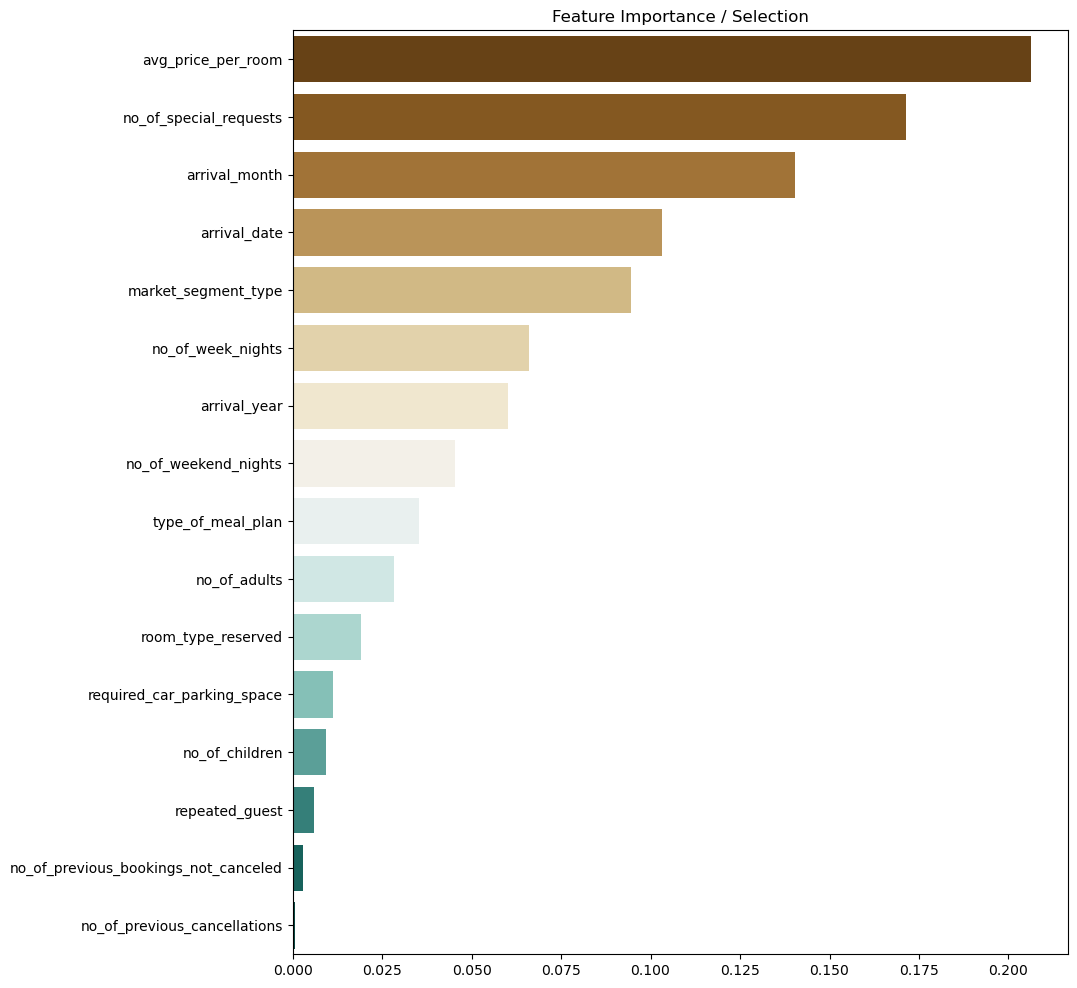

In [92]:
imp = pd.Series(data=Model.feature_importances_, index=Model.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature Importance / Selection")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')

### Predictions on Train Dataset

In [94]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,type_of_meal_plan,room_type_reserved,market_segment_type,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
33534,1,3,4,2,0,2,4,0,2018,5,15,0,0,0,164.9,1,1
2761,0,0,3,2,0,1,2,0,2018,11,14,0,0,0,75.0,1,1
34916,0,3,3,2,0,0,3,0,2017,10,20,0,0,0,75.0,0,1
302,0,0,3,2,0,2,1,0,2018,1,2,1,1,0,63.0,1,1
20804,0,0,3,1,0,1,1,0,2018,4,4,0,0,0,96.0,0,1


In [95]:
train['Predicted']=Model.predict(X_train)
train.head()

In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['booking_status'], train['Predicted'])  # matrix to compare the actual values with the predicted values
print(confusion_matrix)

[[ 7124  2440]
 [ 1228 18228]]


In [99]:
from sklearn.metrics import classification_report
print(classification_report(train['booking_status'], train['Predicted']))  # report on the train data performance

              precision    recall  f1-score   support

           0       0.85      0.74      0.80      9564
           1       0.88      0.94      0.91     19456

    accuracy                           0.87     29020
   macro avg       0.87      0.84      0.85     29020
weighted avg       0.87      0.87      0.87     29020



### Predictions on Test Dataset

In [100]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,type_of_meal_plan,room_type_reserved,market_segment_type,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
8287,0,0,3,3,0,1,3,0,2018,4,4,0,0,0,105.0,1,1
20529,0,0,3,2,0,0,2,0,2018,6,10,0,0,0,130.0,1,1
11817,3,0,4,2,0,1,0,0,2017,11,2,0,0,0,85.5,1,1
24285,0,0,4,2,0,0,1,0,2018,8,4,0,0,0,105.3,0,0
9745,1,0,3,2,0,0,3,0,2017,9,30,0,0,0,125.0,0,1


In [101]:
test['Predicted']=Model.predict(X_test)
test.head()

,type_of_meal_plan,room_type_reserved,market_segment_type,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Predicted
8287,0,0,3,3,0,1,3,0,2018,4,4,0,0,0,105.0,1,1,1
20529,0,0,3,2,0,0,2,0,2018,6,10,0,0,0,130.0,1,1,1
11817,3,0,4,2,0,1,0,0,2017,11,2,0,0,0,85.5,1,1,1
24285,0,0,4,2,0,0,1,0,2018,8,4,0,0,0,105.3,0,0,0
9745,1,0,3,2,0,0,3,0,2017,9,30,0,0,0,125.0,0,1,1


In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['booking_status'])   ###  # matrix to compare the actual values with the predicted value
print(confusion_matrix) 

[[1665  380]
 [ 656 4554]]


In [103]:
from sklearn.metrics import classification_report
print(classification_report(test['booking_status'], test['Predicted']))  #report on the entire report of the test data

              precision    recall  f1-score   support

           0       0.81      0.72      0.76      2321
           1       0.87      0.92      0.90      4934

    accuracy                           0.86      7255
   macro avg       0.84      0.82      0.83      7255
weighted avg       0.85      0.86      0.85      7255



# Gradient boosting

In [104]:
from sklearn.model_selection import train_test_split

X = Final_combined.drop('booking_status', axis = 1)
Y = Final_combined[['booking_status']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=21)   # train data size is 80% of the entire dataset

### Using Gride search to see which values fit best in the model

In [105]:
model_parameters = {'n_estimators': [10,20,50],  # number of trees 
                    'max_depth':    [4, 6],     # max depth of each tree 
                    'learning_rate':[0.9, 0.95], # learning rate higher the learing rate more is the accuracy
                    'min_samples_leaf':[50,100,150],  # min number of sample in the child node
                    'min_samples_split':[25,50,100]}   ## min number of sample in the parent node

In [106]:
from sklearn.ensemble import GradientBoostingClassifier    # importing the librabies
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [107]:
model = GradientBoostingClassifier(random_state=10,loss="log_loss",criterion="squared_error")  # since it is a classification task squared_error is chosen as the criterion
gscv_GBM = GridSearchCV(estimator=model, 
                    param_grid=model_parameters,  
                    cv=10,   #cross validation
                    verbose=1, # to print the result on the console
                    n_jobs=-1,  #  specifies the number of parallel jobs to run during the grid search. Setting it to -1 means that the computation will be dispatched across all available CPUs.
                    scoring='accuracy') #the accuracy score will be used to evaluate the performance of each hyperparameter combination.

gscv_GBM.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(criterion='squared_error',
                                                  random_state=10),
             n_jobs=-1,
             param_grid={'learning_rate': [0.9, 0.95], 'max_depth': [4, 6],
                         'min_samples_leaf': [50, 100, 150],
                         'min_samples_split': [25, 50, 100],
                         'n_estimators': [10, 20, 50]},
             scoring='accuracy', verbose=1)

In [108]:
print('The best parameter are -', gscv_GBM.best_params_)  # printing the best selected parameters

The best parameter are - {'learning_rate': 0.9, 'max_depth': 6, 'min_samples_leaf': 50, 'min_samples_split': 25, 'n_estimators': 50}


In [109]:
final_mod_GBM = GradientBoostingClassifier(**gscv_GBM.best_params_)  # storing it to final_mod_GBM
final_mod_GBM.fit(X_train, y_train)  

GradientBoostingClassifier(learning_rate=0.9, max_depth=6, min_samples_leaf=50,
                           min_samples_split=25, n_estimators=50)

### Prediction

In [110]:
train_pred = final_mod_GBM.predict(X_train)
test_pred = final_mod_GBM.predict(X_test)

In [111]:
train_pred

array([1, 1, 1, ..., 0, 1, 1])

In [112]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))   # report on train data performance

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      9564
           1       0.91      0.93      0.92     19456

    accuracy                           0.89     29020
   macro avg       0.88      0.87      0.88     29020
weighted avg       0.89      0.89      0.89     29020



In [113]:
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))   # # report on test data performance

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.78      0.75      0.76      2321
           1       0.88      0.90      0.89      4934

    accuracy                           0.85      7255
   macro avg       0.83      0.82      0.83      7255
weighted avg       0.85      0.85      0.85      7255



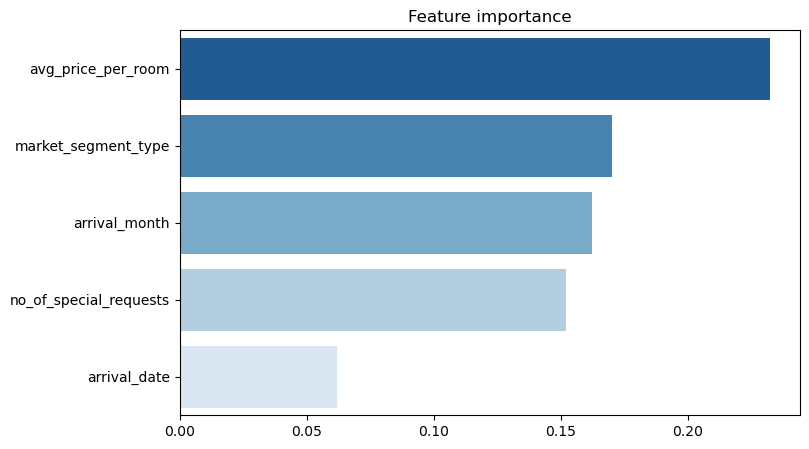

In [114]:
# Plot features importances
imp = pd.Series(data=final_mod_GBM.feature_importances_, index=final_mod_GBM.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(8,5))   #fixing the size of the plot
plt.title("Feature importance")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="Blues_r", orient='h')##  "Blues_r" is a predefined color palette in seaborn, where _r stands for reversed.
                                                                                     ## orient='h': specifies the orientation of the plot. 'h' stands for horizontal, 